In [56]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn 
import scipy as sp 
import mglearn

In [57]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [58]:
print('cancer keys: \n{}'.format(cancer.keys()))

cancer keys: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [59]:
print('cancer features: \n{}'.format(cancer.feature_names))

cancer features: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [60]:
print('cancer targets: \n{}'.format(cancer.target_names))

cancer targets: 
['malignant' 'benign']


In [61]:
cancer.data.shape

(569, 30)

In [62]:
print('counts in each class: \n{}'.format(
      {cls: cnt for cls, cnt in zip(cancer.target_names, np.bincount(cancer.target))}))

counts in each class: 
{'malignant': 212, 'benign': 357}


In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

In [64]:
training_accuracy = []
testing_accuracy = []

In [65]:
# try n neighbous between 1 and 10 
neighbors_settings = range(1, 11)

In [66]:
from sklearn.neighbors import KNeighborsClassifier
for n in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    testing_accuracy.append(knn.score(X_test, y_test))   

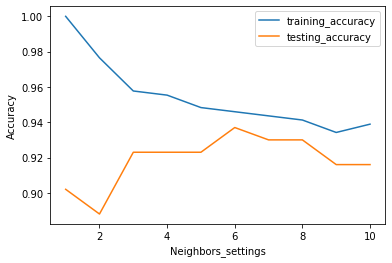

In [67]:
# visusalize the accuracy for different n 
plt.plot(neighbors_settings, training_accuracy, label='training_accuracy')
plt.plot(neighbors_settings, testing_accuracy, label='testing_accuracy')
plt.xlabel('Neighbors_settings')
plt.ylabel('Accuracy')
plt.legend()

In [68]:
# set n neighbors as 5 
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train, y_train)

KNeighborsClassifier()

In [69]:
prediction = knn2.predict(X_test)
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [70]:
cancer['target_names'][prediction]

array(['benign', 'benign', 'benign', 'benign', 'benign', 'benign',
       'benign', 'benign', 'malignant', 'malignant', 'malignant',
       'benign', 'malignant', 'benign', 'benign', 'malignant', 'benign',
       'benign', 'benign', 'benign', 'benign', 'benign', 'benign',
       'benign', 'malignant', 'benign', 'benign', 'malignant', 'benign',
       'malignant', 'malignant', 'malignant', 'benign', 'malignant',
       'malignant', 'benign', 'malignant', 'benign', 'benign',
       'malignant', 'benign', 'malignant', 'benign', 'benign', 'benign',
       'malignant', 'benign', 'benign', 'malignant', 'benign', 'benign',
       'malignant', 'benign', 'benign', 'benign', 'benign', 'malignant',
       'benign', 'benign', 'benign', 'malignant', 'benign', 'malignant',
       'malignant', 'benign', 'benign', 'benign', 'benign', 'malignant',
       'malignant', 'malignant', 'malignant', 'benign', 'malignant',
       'benign', 'malignant', 'benign', 'benign', 'benign', 'benign',
       'benign', '

In [71]:
knn2.score(X_test, y_test)

0.9230769230769231